# CLASSIFICATION MODEL-Build a model that classifies the side effect of a drug by age,gender.

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to python environment 

In [2]:
df=pd.read_csv('archive.zip')
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [4]:
df.shape

(362806, 12)

In [5]:
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [6]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [7]:
df.nunique()    # finding the unique values in the columns

Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250167
Satisfaction          7
Sex                   3
Sides              1651
UsefulCount         148
dtype: int64

In [10]:
for i in df.columns:
    print('Unique values in',i, 'are :')
    print(df[i].value_counts())
    print('*'*50)

Unique values in Age are :
45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64
**************************************************
Unique values in Condition are :
Other                                                    49765
Pain                                                     25232
High Blood Pressure                                      23275
Depression                                               14509
Birth Control                                            12253
                                                         ...  
Infection due to the Bacteria Rickettsia                     1
Additional Medication to Increase Absorption of Drugs        1
Severe Diarrhea                                              1
High Amount of Oxalic Acid in the Urine                   

# DATA PRE-PROCESSING

# 1. Handling Null Values

array([[<AxesSubplot:title={'center':'DrugId'}>,
        <AxesSubplot:title={'center':'EaseofUse'}>],
       [<AxesSubplot:title={'center':'Effectiveness'}>,
        <AxesSubplot:title={'center':'Satisfaction'}>],
       [<AxesSubplot:title={'center':'UsefulCount'}>, <AxesSubplot:>]],
      dtype=object)

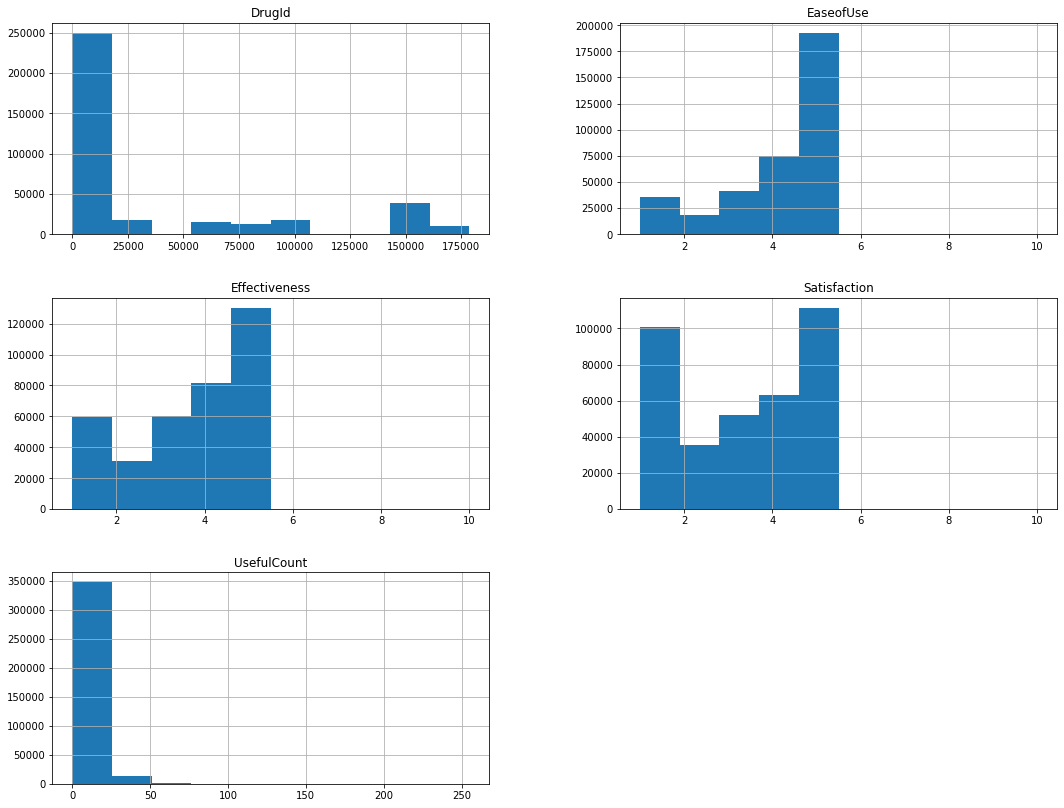

In [11]:
# plotting histograms

df.hist(figsize=(18, 14))

In [12]:
df.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [13]:
df.isnull().sum().sort_values(ascending=False)

Reviews          37
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

We have only one feature with missing value.that is, there are 37 missing vales in the feature Reviews.Since it is a categorical feature so we will replace it with the mode value. The mode value is the value that appears more than any other value. Hence here we are replacing it with the review that appears the most often.


In [14]:
## For the missing values in the review column, replace it with mode (value that appears most often)

df['Reviews'].fillna(df.Reviews.mode().to_string(), inplace=True)

In [15]:
df.isnull().sum().sort_values(ascending=False)

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

# 2. Handling Outliers

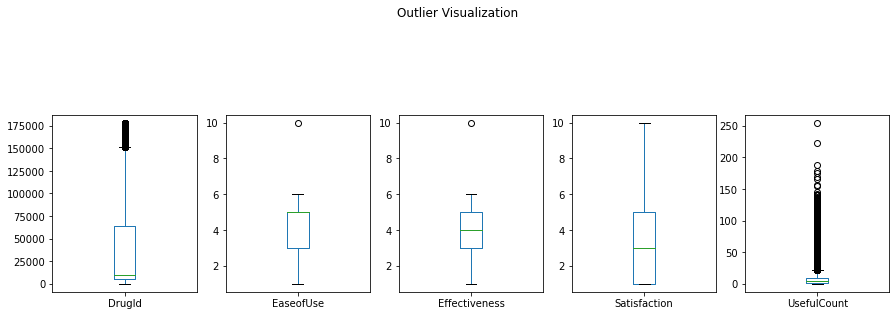

In [16]:
#plotting boxplot

df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,15),title='Outlier Visualization')
plt.show()

In [17]:
#finding the 25th percentile and 75th percentile.
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

 #Inter Quantile Range
IQR=Q3-Q1

#finding lower and upper  bounds for all values.All values outside these bounds are outliers.
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
#finding the sum of the outliers in each column of int and float types.
((df.select_dtypes(include=['float64','int64'])<lower_limit) | (df.select_dtypes(include=['float64','int64'])>upper_limit)).sum()

DrugId           29796
EaseofUse            1
Effectiveness        1
Satisfaction         0
UsefulCount      23247
dtype: int64

Outliers are present in four columns.That is ,in DrugID,Easeofuse,Effectiveness,Satisfaction,UsefulCount. 
But for 'DrugId' and 'UsefulCount', the number of outliers is very large.Thus its removal will affect our problem. 
Hence we will deal  with columns 'EaseofUse' and 'Effectiveness'. 

# 1. checking the outlier in 'EaseofUse' column

Text(0.5, 1.0, 'Box plot  of EaseofUse')

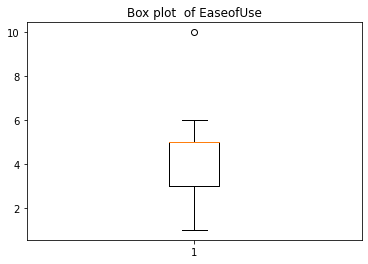

In [19]:
plt.boxplot(df['EaseofUse'])
plt.title('Box plot  of EaseofUse')

In [20]:
Q1=np.percentile(df['EaseofUse'],25,interpolation='midpoint')
Q2=np.percentile(df['EaseofUse'],50,interpolation='midpoint')   
Q3=np.percentile(df['EaseofUse'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3) 

#finding IQR
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

3.0
5.0
5.0
0.0
8.0


In [21]:
#removing outlier using for loop
outlier=[]
for x in df['EaseofUse']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
len(outlier)

1

Text(0.5, 1.0, 'Box plot of EaseofUse')

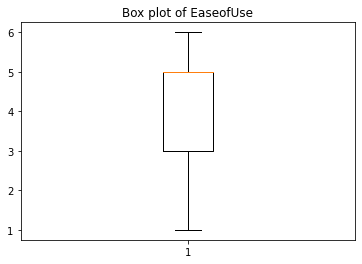

In [22]:
#Removing the outliers
ind1=df['EaseofUse']>up_lim
df.loc[ind1].index
df.drop(df.loc[ind1].index,inplace=True)
plt.boxplot(df['EaseofUse'])
plt.title('Box plot of EaseofUse')

# 2. checking 'Effectiveness' column

Text(0.5, 1.0, 'Box plot  of Effectiveness')

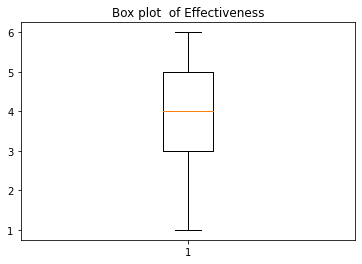

In [23]:
plt.boxplot(df['Effectiveness'])
plt.title('Box plot  of Effectiveness')

In [24]:
Q1=np.percentile(df['Effectiveness'],25,interpolation='midpoint')
Q2=np.percentile(df['Effectiveness'],50,interpolation='midpoint')   
Q3=np.percentile(df['Effectiveness'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3) 

#finding IQR
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

3.0
4.0
5.0
0.0
8.0


In [25]:
#removing outlier using for loop
outlier=[]
for x in df['Effectiveness']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
len(outlier)

0

Text(0.5, 1.0, 'Box plot of Effectiveness')

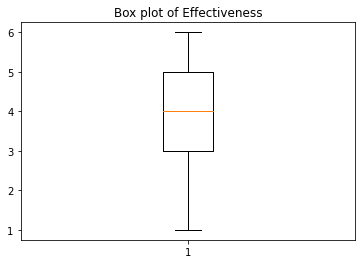

In [26]:
#Removing the outliers
ind1=df['Effectiveness']>up_lim
df.loc[ind1].index
df.drop(df.loc[ind1].index,inplace=True)
plt.boxplot(df['Effectiveness'])
plt.title('Box plot of Effectiveness')

# Feature Reduction

In [27]:
#let's remove the columns Reviews and UsefulCount.Because it is not useful and do not provide any information for our predictive model.

df= df.drop([ 'Reviews', 'UsefulCount'],axis=1)



In [30]:
df.shape

(362805, 10)

# Correlation Matrix

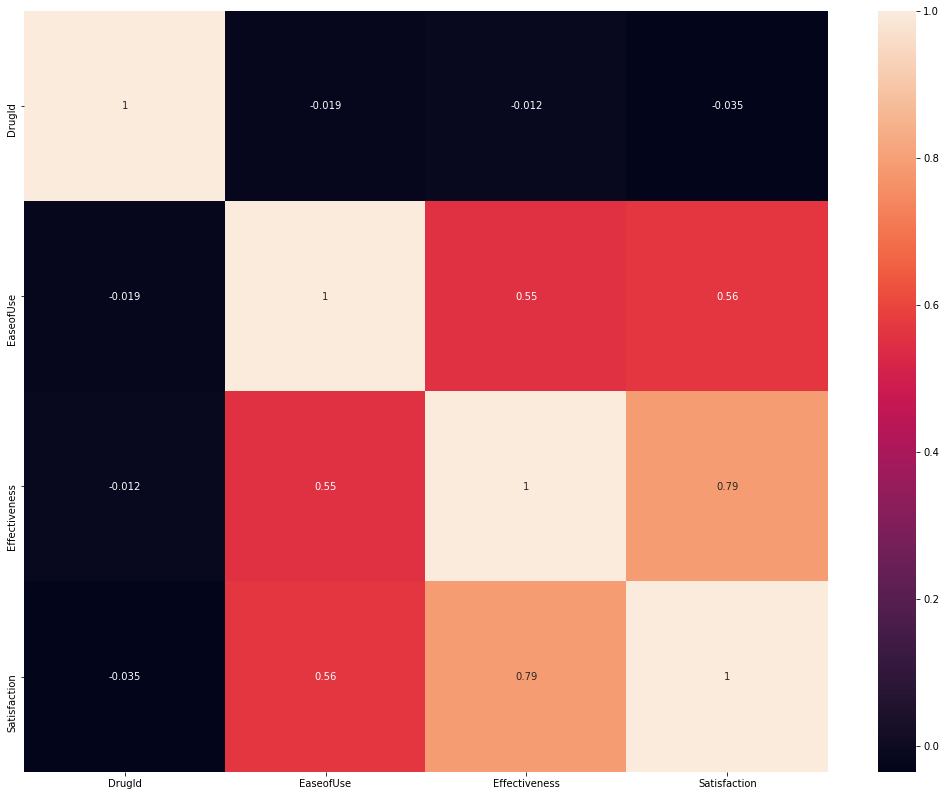

In [29]:
# plottting the heatmap in order to see the correlation.

fig, ax = plt.subplots(figsize=(18,14))
sns.heatmap(df.corr(), annot=True, ax=ax);

In [31]:
# Splitting dataset into x and y
y = df['Sides']
X = df.drop('Sides', axis = 1)

# Encoding

In [32]:
category_columns = ['Condition','Drug', 'Sex']
X[category_columns] = X[category_columns].astype('category')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362805 entries, 0 to 362805
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Age            362805 non-null  object  
 1   Condition      362805 non-null  category
 2   Date           362805 non-null  object  
 3   Drug           362805 non-null  category
 4   DrugId         362805 non-null  int64   
 5   EaseofUse      362805 non-null  int64   
 6   Effectiveness  362805 non-null  int64   
 7   Satisfaction   362805 non-null  int64   
 8   Sex            362805 non-null  category
dtypes: category(3), int64(4), object(2)
memory usage: 29.6+ MB


In [34]:
# Performing label encoding to the categorical variables.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['Condition','Drug', 'Sex']
for column in categorical_columns:
    X[column] = le.fit_transform(X[column])


In [35]:
X.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex
0,75 or over,1596,9/21/2014,4,146724,5,5,5,2
1,25-34,424,1/13/2011,4,146724,5,5,5,1
2,65-74,1184,7/16/2012,6866,144731,2,3,3,1
3,75 or over,1184,9/23/2010,6866,144731,2,2,1,1
4,35-44,1184,1/6/2009,6866,144731,1,1,1,2


In [36]:
df.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Satisfaction      int64
Sex              object
Sides            object
dtype: object

We have encoded all the categorical values into numerical form.